In [62]:
# !pip install wordcloud
# !pip install openpyxl
# !pip install seaborn
# !pip install nbconvert

In [53]:
import pandas as pd
import numpy as np
import os
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Create a set of stopwords
stopwords = set(STOPWORDS)

In [2]:
# Read the data file
df_transcripts = pd.read_csv('../test/parsed_transcripts.csv')

In [3]:
df_transcripts

,File,Original Conversation,Agent,Member
0,transcript_0.txt,"[""Member: Hi, I'm calling to get a case pre-au...","['Hi Emily, thank you for calling PA customer ...","[""Hi, I'm calling to get a case pre-authorized..."
1,transcript_1.txt,"[""Member: Hi, I'm calling about a denied claim...","['I apologize for the inconvenience, MEM123456...","[""Hi, I'm calling about a denied claim I recei..."
2,transcript_2.txt,"[""Member: Hi, I'm calling about my recent doct...","['I apologize for the inconvenience, Mr. Johns...","[""Hi, I'm calling about my recent doctor's vis..."
3,transcript_3.txt,"[""Member: Hi, I'm calling about my recent visi...","['I apologize for the inconvenience, can you p...","[""Hi, I'm calling about my recent visit to the..."
4,transcript_4.txt,"[""Member: Hi, I'd like to schedule an appointm...","[""Thank you for calling us, MEM123456. Can you...","[""Hi, I'd like to schedule an appointment with..."
...,...,...,...,...
195,transcript_195.txt,"[""Member: Hi, I'm calling about my online serv...","[""Hi there, thank you for reaching out to our ...","[""Hi, I'm calling about my online service acco..."
196,transcript_196.txt,"[""Member: Hi, I'm calling to schedule an appoi...","['Thank you for calling us, Emily. Can I just ...","[""Hi, I'm calling to schedule an appointment w..."
197,transcript_197.txt,"[""Member: Hi, I'm calling to get a case pre-au...","['Hi Emily, thank you for calling PA customer ...","[""Hi, I'm calling to get a case pre-authorized..."
198,transcript_198.txt,"[""Member: Hi, I'm calling about my recent visi...","['I apologize for the inconvenience, MEM123456...","[""Hi, I'm calling about my recent visit to the..."


In [18]:
df_transcripts['Original_Text'] = df_transcripts['Original Conversation'].apply(lambda x: "\n".join(ast.literal_eval(x)))

In [30]:
df_transcripts['Member_Text'] = df_transcripts['Member'].apply(lambda x: "\n".join(ast.literal_eval(x)))

In [20]:
df_transcripts['Original_Text']

0      Member: Hi, I'm calling to get a case pre-auth...
1      Member: Hi, I'm calling about a denied claim I...
2      Member: Hi, I'm calling about my recent doctor...
3      Member: Hi, I'm calling about my recent visit ...
4      Member: Hi, I'd like to schedule an appointmen...
                             ...                        
195    Member: Hi, I'm calling about my online servic...
196    Member: Hi, I'm calling to schedule an appoint...
197    Member: Hi, I'm calling to get a case pre-auth...
198    Member: Hi, I'm calling about my recent visit ...
199    Member: Hi, I'm calling about a denied claim. ...
Name: Original_Text, Length: 200, dtype: object

## Analyse the Original Conversation

#### 1. Conversation length analysis

In [26]:
# Calculate the length of each conversation
df_transcripts['Original_Len'] = df_transcripts['Original_Text'].apply(lambda x: len(x.split()))

# Display summary statistics
print(df_transcripts['Original_Len'].describe())


count    200.00000
mean     358.53500
std       61.80622
min      236.00000
25%      312.75000
50%      353.00000
75%      395.25000
max      574.00000
Name: Original_Len, dtype: float64


#### 2. Count top 10 most Frequent words present in the Conversation 

In [23]:

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the conversation text
word_count = vectorizer.fit_transform(df_transcripts['Original_Text'])

# Create a DataFrame of words and their frequencies
word_freq = word_count.sum(axis=0)
word_freq_df = pd.DataFrame(word_freq, columns=vectorizer.get_feature_names_out(), index=['count']).T
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Display the top 10 most common words
print(word_freq_df.head(10))


          count
member     1959
support    1439
customer   1143
thank       786
okay        606
emily       554
ve          473
policy      462
great       416
welcome     381


#### 3. Another method using TF-IDF to analyze the important words in the conversation

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Get mean TF-IDF scores for the phrases
tfidf_matrix = tfidf_vectorizer.fit_transform(df_transcripts['Original_Text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
average_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Display the top 10 terms with the highest average TF-IDF scores
print(average_tfidf.head(10))


member       0.194440
support      0.174559
customer     0.150869
policy       0.092883
emily        0.089050
technical    0.084723
thank        0.079212
claim        0.074152
agent        0.068084
try          0.064704
dtype: float64


#### 4. Creating a word cloud for importance of the words in the data

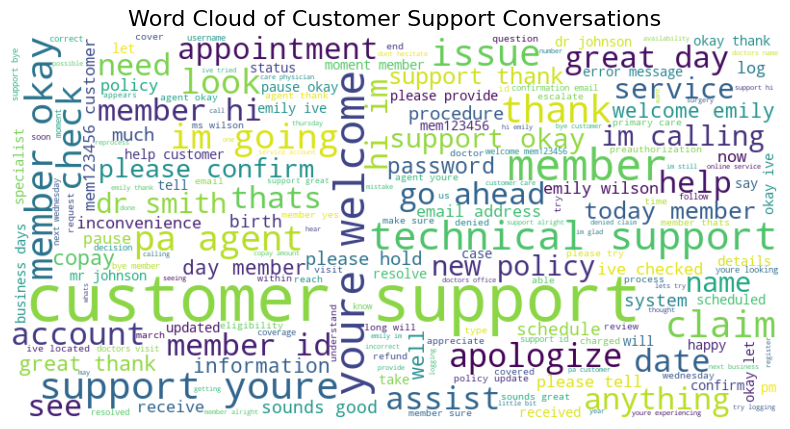

In [39]:
complete_conversation_text = text = ' '.join(df_transcripts['Original_Text'].dropna())
complete_conversation_text = complete_conversation_text.lower()
complete_conversation_text = re.sub(r'[^\w\s]', '', complete_conversation_text)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='viridis', 
                      stopwords=stopwords).generate(complete_conversation_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axis
plt.title('Word Cloud of Customer Support Conversations', fontsize=16)
plt.show()


## Analyse the Customer Conversation

#### 1. Conversation length analysis

In [40]:
# Calculate the length of each conversation
df_transcripts['Member_Len'] = df_transcripts['Member_Text'].apply(lambda x: len(x.split()))

# Display summary statistics
print(df_transcripts['Member_Len'].describe())


count    200.000000
mean     112.435000
std       22.091991
min       66.000000
25%       97.000000
50%      111.000000
75%      126.000000
max      195.000000
Name: Member_Len, dtype: float64


#### 2. Count top 10 most Frequent words present in the Conversation 

In [41]:

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the conversation text
word_count = vectorizer.fit_transform(df_transcripts['Member_Text'])

# Create a DataFrame of words and their frequencies
word_freq = word_count.sum(axis=0)
word_freq_df = pd.DataFrame(word_freq, columns=vectorizer.get_feature_names_out(), index=['count']).T
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Display the top 10 most common words
print(word_freq_df.head(10))


           count
thank        473
okay         342
help         243
hi           199
policy       188
sounds       187
service      174
ve           173
member       163
mem123456    163


#### 3. Another method using TF-IDF to analyze the important words in the conversation

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Get mean TF-IDF scores for the phrases
tfidf_matrix = tfidf_vectorizer.fit_transform(df_transcripts['Member_Text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
average_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Display the top 10 terms with the highest average TF-IDF scores
print(average_tfidf.head(10))


thank      0.113212
okay       0.086032
policy     0.079330
sounds     0.062502
service    0.060950
ve         0.059190
help       0.059120
great      0.053432
claim      0.047163
dr         0.045391
dtype: float64


#### 4. Creating a word cloud for importance of the words in the data

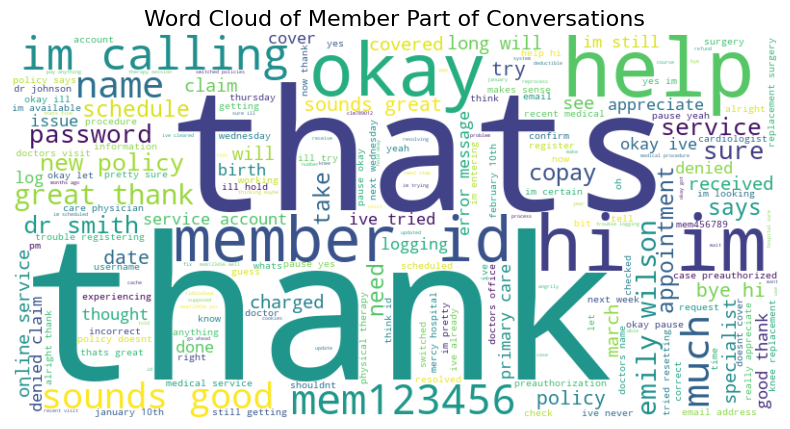

In [44]:
member_conversation_text = text = ' '.join(df_transcripts['Member_Text'].dropna())
member_conversation_text = member_conversation_text.lower()
member_conversation_text = re.sub(r'[^\w\s]', '', member_conversation_text)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='viridis', 
                      stopwords=stopwords).generate(member_conversation_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axis
plt.title('Word Cloud of Member Part of Conversations', fontsize=16)
plt.show()


## Analyze the Class Distribution Generated by Manually Labelling the Test Data (40 Data Points)

In [50]:
test_df = pd.read_excel("../test/test_actual_label.xlsx")
test_df.head()

,Filename,Sentiment,Call_Outcome
0,transcript_160,Negative,Follow-up action needed
1,transcript_161,Positive,Issue Resolved
2,transcript_162,Positive,Issue Resolved
3,transcript_163,Neutral,Follow-up action needed
4,transcript_164,Positive,Issue Resolved


#### 1. Class Distribution

Sentiment
Positive    29
Neutral      7
Negative     4
Name: count, dtype: int64


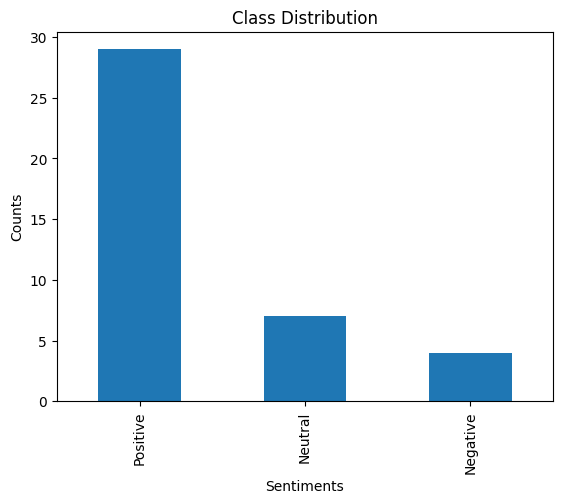

In [51]:
# Count the occurrences of each class
class_counts = test_df['Sentiment'].value_counts() 
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution', xlabel='Sentiments', ylabel='Counts')
plt.show()


Call_Outcome
Issue Resolved             24
Follow-up action needed    16
Name: count, dtype: int64


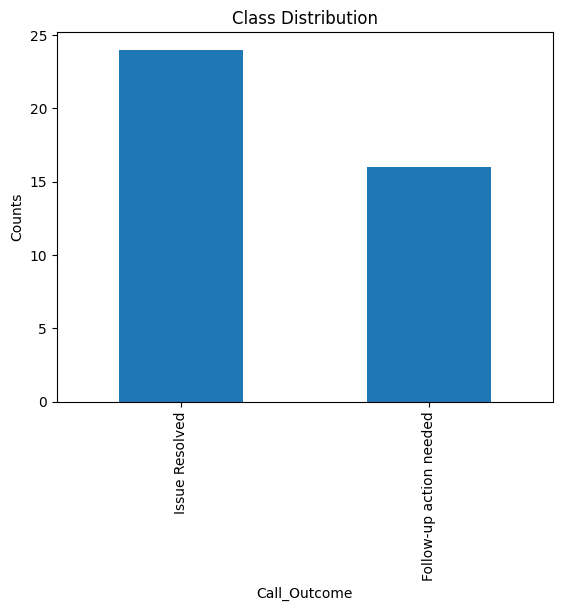

In [60]:
# Count the occurrences of each class
class_counts = test_df['Call_Outcome'].value_counts() 
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution', xlabel='Call_Outcome', ylabel='Counts')
plt.show()

Call_Outcome  Follow-up action needed  Issue Resolved
Sentiment                                            
Negative                            2               2
Neutral                             6               1
Positive                            8              21


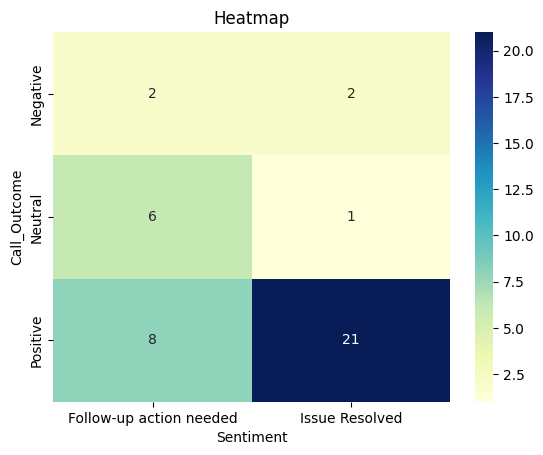

In [59]:

# Create a cross-tabulation
cross_tab = pd.crosstab(test_df['Sentiment'], test_df['Call_Outcome'])
print(cross_tab)

# Visualize the cross-tabulation
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Call_Outcome')
plt.show()